# Facial Image Data Compression

In [1]:
%matplotlib notebook
import os
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
import matplotlib.cm as cm
from DimRed import PrCA

### Read all the images in a 2-D array

In [2]:
X = []
width1, height1 = 0,0
img_path = 'Olivetti-PNG-master/images/'                       # Path of the images
for img in os.listdir(img_path):
    f = io.imread(os.path.join(img_path, img), as_grey=True)   # Read each image
    [width1,height1]=[f.shape[0],f.shape[1]]
    f2=f.reshape(width1*height1)                               # Reshape the image into a 1D array
    X.append(f2.copy())
X = np.array(X)

### Analysis of eigen values

In [3]:
pc = PrCA()                                                   # Instantiate the class
pc.fit(X)                                                     # Find the eigen values

<IPython.core.display.Javascript object>


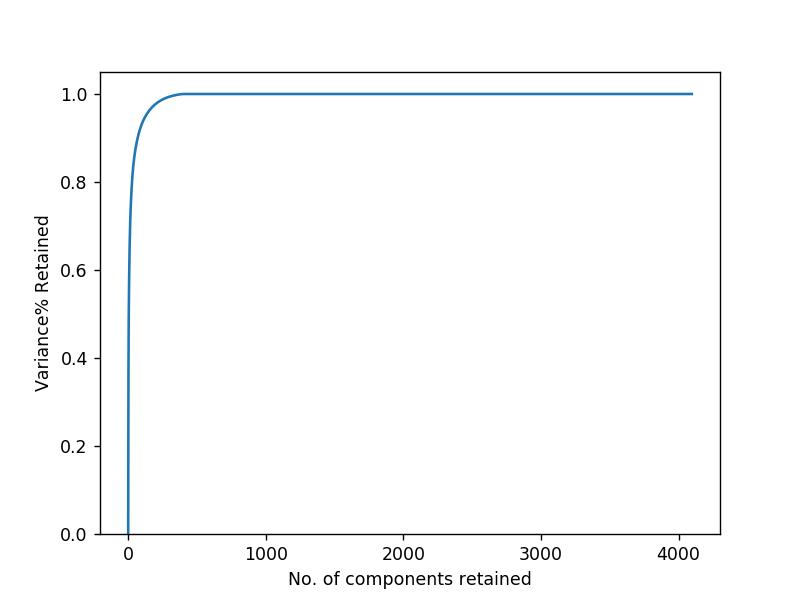

In [4]:
pc.eigen_analysis()                                           # Plot

In [5]:
st = pc.retain_var(0.95)                                      # Retain 95% variance
st.shape                                                      # Corresponding coeffs

(400, 128)

In [6]:
pc.save_eigenfaces('compressed/',width1,height1)              # Store eigenfaces

In [7]:
pc.save_coeff('compressed/')                                  # Store coeffs

The folder 'compressed' contains the compressed database with eigen faces and coefficients needed to reconstruct each image.

In [14]:
old_size = X.shape[0]*X.shape[1]
old_size

1638400

The original database required 'old_size' number of values to be stored.

In [18]:
new_size = ((pc.idx+1)*pc.evec.shape[0]) + (st.shape[0]*st.shape[1])    # Eigenfaces and coeffs
new_size

575488

The compressed database requires only 'new_size' number of values.
Each image can be reconstructed back using these values.

In [20]:
compr = ((old_size-new_size)/old_size)*100
compr                                                        # Compression percentage

64.875

### Restoring back all the images

In [8]:
pc.load_coeff('compressed/')

In [23]:
start_time = timeit.default_timer()
Xr = pc.restore()                                             # Reconstruct all the images
elapsed = timeit.default_timer() - start_time
elapsed                                                       # Time taken to reconstruct all the images

0.029486800000029234

In [10]:
l = []
for i in range(Xr.shape[0]):
    l.append(str(i))           
l.sort()                                                      # For correct respective numbering
for i in range(Xr.shape[0]):
    plt.imsave('new_images/'+str(l[i])+'.png',Xr[i,:].reshape((width1,height1)),cmap=cm.gray)

In [11]:
pc.error()                                                    # Reconstruction Error per pixel

7.212248073826495